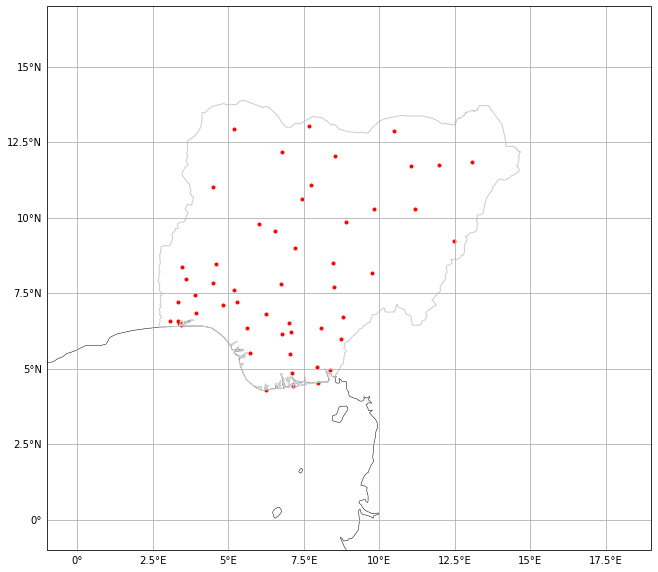

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import pandas as pd

countries = shapereader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')

# Find the Nigeria boundary polygon.
for country in shapereader.Reader(countries).records():
    if country.attributes['SU_A3'] == 'NGA':
        nigeria = country.geometry
        break
else:
    raise ValueError('Unable to find the NGA boundary.')

plt.figure(figsize=(20, 10))
ax_map = plt.axes(projection=ccrs.PlateCarree())

ax_map.set_extent([-1, 19, -1, 17], ccrs.PlateCarree())

#ax_map.coastlines()
ax_map.add_feature(feature.COASTLINE, linewidth=.5)

ax_map.add_geometries([nigeria], ccrs.PlateCarree(), edgecolor='0.8',
                  facecolor='none')

grid_lines = ax_map.gridlines(draw_labels=True)
grid_lines.top_labels = False
grid_lines.right_labels = False

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

ax_map.xaxis.set_major_formatter(lon_formatter)
ax_map.yaxis.set_major_formatter(lat_formatter)

df = pd.read_csv("met_ngstation.csv")

plt.scatter(df['LONG'],df['LAT'],
                    color='red', marker='.', transform=ccrs.PlateCarree())


#plt.savefig('coastlines_ng.pdf')
#plt.savefig('coastlines_ng.png')

plt.show()

posx and posy should be finite values
posx and posy should be finite values


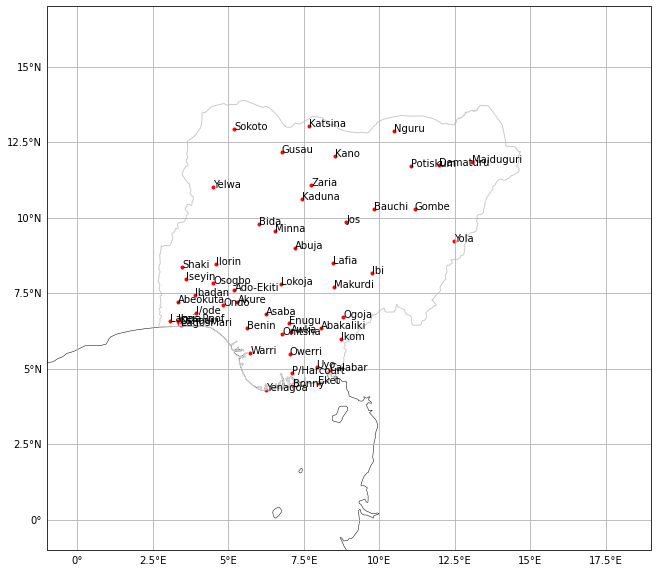

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import pandas as pd

countries = shapereader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')

# Find the Nigeria boundary polygon.
for country in shapereader.Reader(countries).records():
    if country.attributes['SU_A3'] == 'NGA':
        nigeria = country.geometry
        break
else:
    raise ValueError('Unable to find the NGA boundary.')

plt.figure(figsize=(20, 10))
ax_map = plt.axes(projection=ccrs.PlateCarree())

ax_map.set_extent([-1, 19, -1, 17], ccrs.PlateCarree())

#ax_map.coastlines()
ax_map.add_feature(feature.COASTLINE, linewidth=.5)

ax_map.add_geometries([nigeria], ccrs.PlateCarree(), edgecolor='0.8',
                  facecolor='none')

grid_lines = ax_map.gridlines(draw_labels=True)
grid_lines.top_labels = False
grid_lines.right_labels = False

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

ax_map.xaxis.set_major_formatter(lon_formatter)
ax_map.yaxis.set_major_formatter(lat_formatter)

df = pd.read_csv("met_ngstation.csv")

plt.scatter(df['LONG'],df['LAT'],
                    color='red', marker='.', transform=ccrs.PlateCarree())

#Label the stations
def labelLocation(x, y, val, ax_map):
    dt = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in dt.iterrows():
        ax_map.text(point['x'], point['y'], str(point['val']))

labelLocation(df['LONG'], df['LAT'], df['STATIONS'], plt)

#plt.savefig('coastlines_ng2.pdf')
#plt.savefig('coastlines_ng2.png')

plt.show()